<a href="https://colab.research.google.com/github/ChhaviC/comp3132/blob/main/Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ASSIGNMENT 4
#Chhavi Chhabra
#101412182

In [ ]:
#1. Import Libraries & Load CIFAR-10 Dataset
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
#2.Data preparation
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Split train into train/validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2)


In [ ]:
#3.Baseline CNN Model (to show overfitting)
baseline_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

baseline_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

history_base = baseline_model.fit(x_train, y_train, epochs=15,
                                  validation_data=(x_val, y_val))


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 64s 49ms/step - accuracy: 0.3533 - loss: 1.7640 - val_accuracy: 0.5615 - val_loss: 1.2590
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 60s 48ms/step - accuracy: 0.5756 - loss: 1.2058 - val_accuracy: 0.6145 - val_loss: 1.1121
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 48ms/step - accuracy: 0.6309 - loss: 1.0545 - val_accuracy: 0.6440 - val_loss: 1.0255
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - accuracy: 0.6706 - loss: 0.9415 - val_accuracy: 0.6398 - val_loss: 1.0342
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 48ms/step - accuracy: 0.6979 - loss: 0.8723 - val_accuracy: 0.6703 - val_loss: 0.9602
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 45ms/step - accuracy: 0.7128 - loss: 0.8251 - val_accuracy: 0.6649 - val_loss: 0.9886
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 58s 47ms/step - accuracy: 0.7322 - loss: 0.7640 - val_accuracy: 0.6675 - val_loss: 0.9699
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 48ms/step - accuracy: 0.7504 -

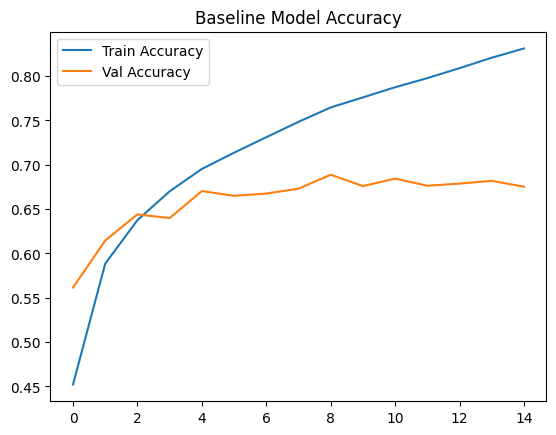

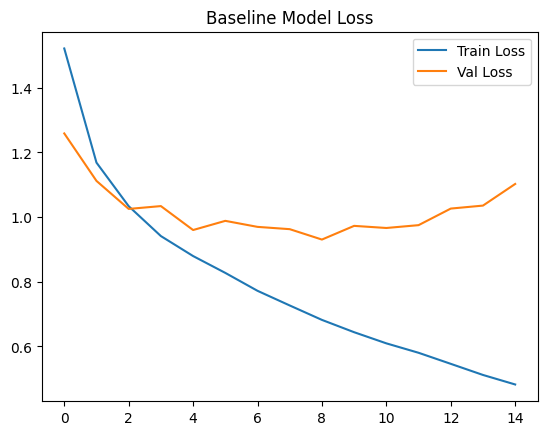

In [ ]:
#4. Plot Accuracy & Loss (Graph 1 & 2)
plt.plot(history_base.history['accuracy'], label='Train Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Val Accuracy')
plt.title('Baseline Model Accuracy')
plt.legend()
plt.show()

plt.plot(history_base.history['loss'], label='Train Loss')
plt.plot(history_base.history['val_loss'], label='Val Loss')
plt.title('Baseline Model Loss')
plt.legend()
plt.show()


In [ ]:
#5. Improved Model with Regularization & Dropout (L2 + Dropout)
reg_model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

reg_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_reg = reg_model.fit(x_train, y_train, epochs=15,
                            validation_data=(x_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 54ms/step - accuracy: 0.3403 - loss: 1.8207 - val_accuracy: 0.5179 - val_loss: 1.3941
Epoch 2/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.5333 - loss: 1.3650 - val_accuracy: 0.5923 - val_loss: 1.2138
Epoch 3/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.5824 - loss: 1.2330 - val_accuracy: 0.6286 - val_loss: 1.1402
Epoch 4/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 84s 52ms/step - accuracy: 0.6142 - loss: 1.1565 - val_accuracy: 0.6304 - val_loss: 1.1348
Epoch 5/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.6312 - loss: 1.0994 - val_accuracy: 0.6594 - val_loss: 1.0685
Epoch 6/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.6555 - loss: 1.0556 - val_accuracy: 0.6582 - val_loss: 1.0736
Epoch 7/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 85s 52ms/step - accuracy: 0.6607 - loss: 1.0419 - val_accuracy: 0.6729 - val_loss: 1.0184
Epoch 8/15
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.6669 -

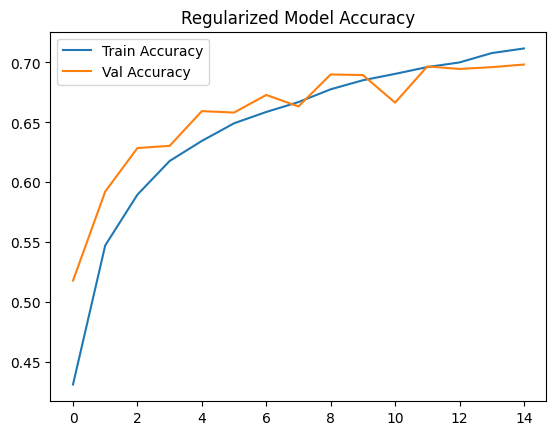

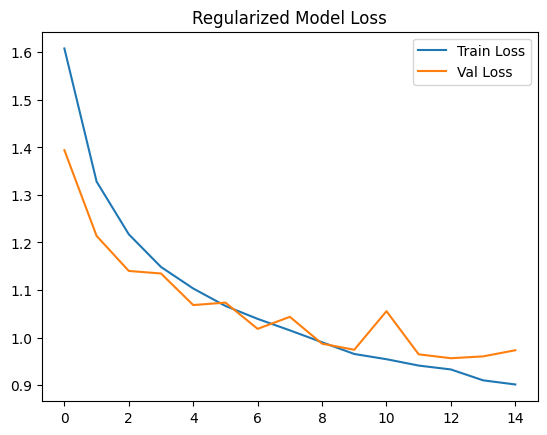

In [ ]:
#6. Plot Regularized Model (Graph 3 & 4)
plt.plot(history_reg.history['accuracy'], label='Train Accuracy')
plt.plot(history_reg.history['val_accuracy'], label='Val Accuracy')
plt.title('Regularized Model Accuracy')
plt.legend()
plt.show()

plt.plot(history_reg.history['loss'], label='Train Loss')
plt.plot(history_reg.history['val_loss'], label='Val Loss')
plt.title('Regularized Model Loss')
plt.legend()
plt.show()


In [ ]:
#7. Data Augmentation Example
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)
augmented_model = tf.keras.models.clone_model(reg_model)
augmented_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_aug = augmented_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                                  epochs=15, validation_data=(x_val, y_val))


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 131ms/step - accuracy: 0.2743 - loss: 1.9923 - val_accuracy: 0.4417 - val_loss: 1.5856
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 138s 126ms/step - accuracy: 0.4462 - loss: 1.5634 - val_accuracy: 0.5178 - val_loss: 1.4061
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.4901 - loss: 1.4637 - val_accuracy: 0.5562 - val_loss: 1.2891
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 123ms/step - accuracy: 0.5107 - loss: 1.4070 - val_accuracy: 0.5777 - val_loss: 1.2315
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.5294 - loss: 1.3539 - val_accuracy: 0.6058 - val_loss: 1.1796
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 120ms/step - accuracy: 0.5471 - loss: 1.3175 - val_accuracy: 0.6135 - val_loss: 1.1534
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 123ms/step - accuracy: 0.5565 - loss: 1.2944 - val_accuracy: 0.6051 - val_loss: 1.1708
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 123ms/step - accuracy: 0.5675 - loss: 

In [ ]:
#8. Final Evaluation
test_loss, test_acc = augmented_model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6661 - loss: 1.0108
Test Accuracy: 0.6646000146865845
